This Notebook has detail code used for exploring various features and models for predicting Memorability. 

Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os

Importing the Ground Truth Dataset from CSV file

In [2]:
ground_truth = pd.read_csv('dev-set_ground-truth.csv')

In [3]:
ground_truth.head()

,video,short-term_memorability,nb_short-term_annotations,long-term_memorability,nb_long-term_annotations
0,video3.webm,0.924,34,0.846,13
1,video4.webm,0.923,33,0.667,12
2,video6.webm,0.863,33,0.700,10
3,video8.webm,0.922,33,0.818,11
4,video10.webm,0.950,34,0.900,10


Checking the correlation between the columns

In [4]:
ground_truth.corr()

,short-term_memorability,nb_short-term_annotations,long-term_memorability,nb_long-term_annotations
short-term_memorability,1.000000,-0.021178,0.325002,-0.013858
nb_short-term_annotations,-0.021178,1.000000,-0.047093,0.285548
long-term_memorability,0.325002,-0.047093,1.000000,0.036051
nb_long-term_annotations,-0.013858,0.285548,0.036051,1.000000


Annotations do not have high correlation with any of the columns, so eliminationg those columns

In [5]:
ground_truth = ground_truth.drop(['nb_short-term_annotations', 'nb_long-term_annotations'], axis=1)

In [6]:
ground_truth.head()

,video,short-term_memorability,long-term_memorability
0,video3.webm,0.924,0.846
1,video4.webm,0.923,0.667
2,video6.webm,0.863,0.700
3,video8.webm,0.922,0.818
4,video10.webm,0.950,0.900


<font style="font-size:25px;text-align:center;">***Extracting features using Captions***</font>

Importing the captions from a text file

In [7]:
video_captions = pd.read_csv('dev-set_video-captions.txt',delimiter='\t',header= None,names=('video','Captions'))

In [8]:
video_captions.head()

,video,Captions
0,video3.webm,blonde-woman-is-massaged-tilt-down
1,video4.webm,roulette-table-spinning-with-ball-in-closeup-shot
2,video6.webm,khr-gangsters
3,video8.webm,medical-helicopter-hovers-at-airport
4,video10.webm,couple-relaxing-on-picnic-crane-shot


Exploring the high scores of short-term memorabilty and Long-term memorability by merfing ground truth and captions

In [9]:
df = pd.merge(ground_truth, video_captions, on = 'video')

Top 10 short term scores and their captions

In [10]:
df.nlargest(10, ['short-term_memorability']) 

,video,short-term_memorability,long-term_memorability,Captions
651,video798.webm,0.989,1.000,camera-moves-in-on-beared-man-with-shovel-taki...
1599,video1981.webm,0.987,0.769,happy-stylish-elegant-young-couple-welcoming-i...
3910,video4903.webm,0.987,0.600,mather-and-daughter-enjoying-a-movie-on-tablet
1771,video2203.webm,0.986,0.800,astronaut-in-outer-space-against-the-backdrop-...
1903,video2364.webm,0.986,1.000,head-of-big-yellow-eel
2089,video2596.webm,0.986,0.733,funny-little-boy-sitting-at-desk-eating-apple-...
4024,video5047.webm,0.986,1.000,khr-western-unloadinggun
4880,video6103.webm,0.986,0.731,young-asian-woman-during-snowfall-slowmotion
398,video498.webm,0.985,0.750,man-reading-in-closed-in-porch
633,video778.webm,0.985,0.929,portrait-of-real-asian-people-with-emotions-an...


Highly associated words are with humans and actions

Top 10 long term scores and their captions

In [11]:
df.nlargest(10, ['long-term_memorability']) 

,video,short-term_memorability,long-term_memorability,Captions
8,video17.webm,0.777,1.0,hoover-dam-tourists-traffic
9,video18.webm,0.863,1.0,happy-girl-stretching-and-relaxing-on-the-station
33,video44.webm,0.828,1.0,christmas-market-at-schloss-charlottenburg-cha...
44,video56.webm,0.953,1.0,trackingof-a-couple-removing-a-sign-from-the-f...
46,video58.webm,0.744,1.0,firefighters-by-flaming-car
50,video63.webm,0.924,1.0,steadicamof-african-american-american-sports-f...
51,video65.webm,0.979,1.0,cowboy-pounds-fencepost
54,video68.webm,0.937,1.0,young-couple-portrait-smile-with-happiness-wit...
69,video85.webm,0.924,1.0,puppies-playing
70,video86.webm,0.983,1.0,young-couple-with-bottle-of-wine-standing-on-s...


Same here, humans and their actions are the words that are present in top 10 videos

Cleaning the text data of Captions using NLP Libraries

Importing the NLP Libraries

In [12]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/swathikiran/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Removing the special charecters and retaining only text data in lowercase text,
Removing Stopwords,
Storing the cleaned text data into a list named captions

In [13]:
cleaned_captions = []
for i in range(0, 6000):
    text = re.sub('[^a-zA-Z]', ' ', video_captions['Captions'][i])
    text = text.lower()
    text = text.split()
    text = [word for word in text if not word in set(stopwords.words('english'))]
    text = ' '.join(text)
    cleaned_captions.append(text)

In [14]:
cleaned_captions[0]

'blonde woman massaged tilt'

***Giving weights to certain words ***

Giving lower values to negetive coefficient words ( weights chose in range between 0 and 0.20)

In [153]:
negavtive_weights = {'mountains':0.01,'sunset':0.02,'trees':0.03,'mountain':0.04,'clouds':0.05,'river':0.06,'aerialof':0.07,'lake':0.08,'forest':0.09,'kenya':0.10,'landscape':0.11,'valley':0.12,'leaves':0.13,'sun':0.14}

Giving higher values to positive coefficient words ( weights chose in range between 0.50 and 0.70)

In [154]:
positive_weights = {'woman':0.65,'eating':0.64,'putting':0.63,'lying':0.62,'girl':0.61,'selfie':0.60,'relaxing':0.59,'jellyfish':0.58,'cat':0.57,'super':0.56,'slow':0.55,'super':0.54,'american':0.53,'potrait':0.52,'pregnant':0.51,'couple':0.50}

I am checking if a word in caption exisits in my weights , if so then i am adding thje weights for that caption

In [155]:
pos_list = []
neg_list = []
for i in range(0, 6000):
    local_pos_weight = 0
    local_neg_weight = 0
    text = video_captions['Captions'][i]
    text = text.split()
    for word in text:
        if(word in set(positive_weights.keys())):
                pw = local_pos_weight + positive_weights[word]
        if(word in set(negavtive_weights.keys())):
                nw = local_neg_weight + negavtive_weights[word]
    pos_list.append(local_pos_weight)
    neg_list.append(local_neg_weight)

In [156]:
weights_df = pd.DataFrame(
    {'positive_weights': pos_list,
     'negative_weights': neg_list
    })

Extracting the count features from the captions

In [15]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

Extracting the TFIDF features from the captions

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer()

Using CountVectorizer for feature Extraction

In [17]:
caption_features = cv.fit_transform(cleaned_captions).toarray()

In [18]:
caption_features[0]

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [19]:
caption_features.shape

(6000, 5087)

The training set captions are ready now, In this scenario i have used count vectorizer to convert them into machine readable features

<font style="font-size:25px;text-align:center;">***Extracting the features from C3D***</font>

Defining the method for reading C3D Features from a file

In [20]:
def read_C3D(fname):
    """Scan vectors from file"""
    with open(fname) as f:
        for line in f:
            C3D =[float(item) for item in line.split()] # convert to float type, using default separator
    return C3D

Calling the method for fetching C3D features and storing them into a array list using loop

In [21]:
my_numlist= [] # Creating new list to store the C3D features
my_namelist = [] #Creating a new list to store the names of the videos
path = 'C3D/*.txt'
for filename in glob.glob('C3D/*.txt'):
    s= read_C3D(filename)
    my_numlist.append(s)
    my_namelist.append(((filename.split('/')[-1]).split('.')[0])+ '.webm') 
#adding .webm to the name to make it similar to the video name in ground truth

In [22]:
len(my_numlist[0]) #All 101 features have been captured

101

In [23]:
len(my_numlist) 

6000

Creating a dataframe to store the extracted C3D features with their video names

In [24]:
c3d = pd.DataFrame(np.array(my_numlist).reshape(6000,101))
c3d["video"] = my_namelist
#creating new column as video and assigning the names of the vidoes

In [25]:
c3d.head() 
#includes video names and captions, which will help further while merging these features with ground truth

,0,1,2,3,4,5,6,7,8,9,...,92,93,94,95,96,97,98,99,100,video
0,1.016593e-02,0.003529,3.596300e-04,3.730000e-06,7.100000e-07,0.000002,0.000011,1.240000e-06,0.000002,7.410000e-06,...,4.500000e-07,7.300000e-07,0.000074,8.930000e-06,8.000000e-08,1.515000e-05,6.920740e-03,5.757750e-03,0.001361,video4960.webm
1,1.100000e-07,0.000003,2.000000e-08,2.000000e-08,1.000000e-08,0.998340,0.001243,7.000000e-08,0.000002,6.200000e-07,...,2.000000e-08,5.000000e-08,0.000000,1.200000e-07,3.740000e-06,3.000000e-08,6.000000e-08,3.300000e-07,0.000002,video1818.webm
2,5.099310e-03,0.003971,4.524705e-02,1.191236e-02,4.797800e-04,0.001651,0.000028,5.206160e-03,0.001073,3.011200e-04,...,5.056720e-03,3.543000e-04,0.015899,4.936500e-04,1.232000e-05,1.196730e-03,3.608730e-03,1.307450e-03,0.015382,video6811.webm
3,7.262300e-04,0.000772,8.653800e-04,8.510000e-06,1.606000e-05,0.000046,0.000535,7.480000e-06,0.000392,1.807000e-05,...,1.903500e-04,3.845000e-05,0.000050,4.490100e-04,1.281000e-05,6.549500e-04,5.448000e-05,7.443100e-04,0.042389,video3969.webm
4,2.519000e-04,0.002037,8.340000e-06,2.389000e-05,1.657600e-04,0.000002,0.000001,3.010000e-06,0.000020,1.483000e-05,...,1.520000e-05,7.500000e-07,0.000075,1.070000e-05,7.600000e-07,1.825000e-05,6.562000e-05,3.131800e-04,0.000002,video993.webm


Merging the datsets with ground truth and C3D features using Video column

In [26]:
c3d_df = pd.merge(ground_truth, c3d, on='video')

In [27]:
c3d_df.head()

,video,short-term_memorability,long-term_memorability,0,1,2,3,4,5,6,...,91,92,93,94,95,96,97,98,99,100
0,video3.webm,0.924,0.846,0.020249,0.001578,0.000826,0.000945,0.000063,0.000003,0.001162,...,0.001042,0.000161,0.000257,0.046617,0.000156,0.000006,0.000537,0.000339,0.008437,0.000470
1,video4.webm,0.923,0.667,0.000118,0.000891,0.000188,0.000045,0.000063,0.000002,0.000641,...,0.000582,0.000393,0.000864,0.000947,0.000136,0.000007,0.000360,0.000159,0.001025,0.000020
2,video6.webm,0.863,0.700,0.011765,0.000746,0.000784,0.000013,0.000007,0.000028,0.000041,...,0.000224,0.000003,0.000031,0.002538,0.000104,0.000005,0.000064,0.005380,0.001027,0.001384
3,video8.webm,0.922,0.818,0.000223,0.000165,0.000007,0.000016,0.000005,0.000014,0.000154,...,0.000046,0.000009,0.000023,0.000053,0.000048,0.000019,0.000001,0.000004,0.000380,0.000029
4,video10.webm,0.950,0.900,0.000090,0.000615,0.003436,0.001281,0.003551,0.000313,0.000042,...,0.000037,0.000690,0.000171,0.000231,0.000637,0.000040,0.000061,0.000075,0.000002,0.001323


locking the feature attributes onlt from the dataframe

In [28]:
c3d_features = c3d_df.iloc[:,3:104].values

In [29]:
c3d_features.shape

(6000, 101)

The training set C3D features are ready now and they can now be used into model directly.

<font style="font-size:25px;text-align:center;">**Defining Get_Score method to calculate the Spearmen's Score**</font>

In [30]:
def Get_score(Y_pred,Y_true):
    '''Calculate the Spearmann"s correlation coefficient'''
    Y_pred = np.squeeze(Y_pred)
    Y_true = np.squeeze(Y_true)
    if Y_pred.shape != Y_true.shape:
        print('Input shapes don\'t match!')
    else:
        if len(Y_pred.shape) == 1:
            Res = pd.DataFrame({'Y_true':Y_true,'Y_pred':Y_pred})
            score_mat = Res[['Y_true','Y_pred']].corr(method='spearman',min_periods=1)
            print('The Spearman\'s correlation coefficient is: %.3f' % score_mat.iloc[1][0])
        else:
            for ii in range(Y_pred.shape[1]):
                Get_score(Y_pred[:,ii],Y_true[:,ii])

<font style="font-size:25px;text-align:center;">***Building the Models***</font>

<font style="font-size:20px;text-align:center;">***Using C3D features alone***</font>

Inputting the data into X and Y variables

In [138]:
X = c3d_features
y = ground_truth.iloc[:, 1:3].values

Splitting the dataset into the Training set and Test set

In [139]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

Using Linear Regression Model on C3D

In [140]:
from sklearn.linear_model import LinearRegression
LMregressor = LinearRegression()
LMregressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [141]:
y_pred = LMregressor.predict(X_test)
Get_score(y_pred, y_test)

The Spearman's correlation coefficient is: 0.280
The Spearman's correlation coefficient is: 0.126


Using Decision Tree Regression Model on C3D

In [142]:
from sklearn.tree import DecisionTreeRegressor
DTregressor = DecisionTreeRegressor()
DTregressor.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [143]:
y_pred = DTregressor.predict(X_test)
Get_score(y_pred, y_test)

The Spearman's correlation coefficient is: 0.098
The Spearman's correlation coefficient is: 0.006


Fitting Random Forest Regression model on C3D

In [42]:
from sklearn.ensemble import RandomForestRegressor
RFregressor = RandomForestRegressor(n_estimators=500)
RFregressor.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

Predicting the values using the trained model

In [43]:
y_pred = RFregressor.predict(X_test)
Get_score(y_pred, y_test)

The Spearman's correlation coefficient is: 0.260
The Spearman's correlation coefficient is: 0.094


Visualizing the results

In [144]:
#Storing the predicted results into a dataframe 
pred = pd.DataFrame(np.array(y_pred).reshape(1200,2), columns = ("shortPred","longPred"))

In [145]:
#Storing the actual test set values into a dataframe
actual = pd.DataFrame(np.array(y_test).reshape(1200,2), columns = ("shortActual","longActual"))

plotting the Actual vs Predicited for Short Term Memorability

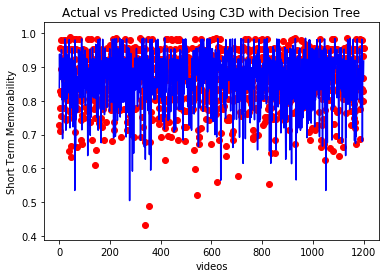

In [148]:
xTest = range(1,1201)
plt.scatter(xTest, actual["shortActual"], color = 'red')
plt.plot(xTest, pred["shortPred"], color = 'blue')
plt.title('Actual vs Predicted Using C3D with Decision Tree')
plt.xlabel('videos')
plt.ylabel('Short Term Memorability')
plt.show()

plotting the Actual vs Predicited for Long Term Memorability

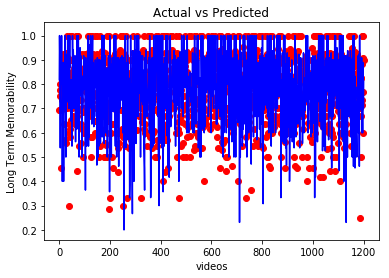

In [147]:
xTest = range(1,1201)
plt.scatter(xTest, actual["longActual"], color = 'red')
plt.plot(xTest, pred["longPred"], color = 'blue')
plt.title('Actual vs Predicted Using C3D with Decision Tree')
plt.xlabel('videos')
plt.ylabel('Long Term Memorability')
plt.show()

Fitting ANN model on C3D alone

In [41]:
!pip install pyprind

distributed 1.21.8 requires msgpack, which is not installed.
You are using pip version 10.0.1, however version 19.0.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [42]:
from keras import Sequential
from keras import layers
from keras import regularizers
import pyprind
from collections import Counter

/Users/swathikiran/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [45]:
c3d_features.shape

(6000, 101)

In [46]:
max_len =101

In [47]:
X = c3d_features
y = ground_truth.iloc[:, 1:3].values

In [49]:
X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size=0.2)

Building a sequntial model with 2 layers.

In [50]:
model = Sequential()
model.add(layers.Dense(64,activation='relu',kernel_regularizer=regularizers.l2(0.001),input_shape=(max_len,)))
model.add(layers.Dropout(0.6))
model.add(layers.Dense(64,activation='relu',kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(2,activation='sigmoid'))

# compile the model 
model.compile(optimizer='rmsprop',loss='mse',metrics=['accuracy'])

# training the model 
history = model.fit(X_train,Y_train,epochs=10,validation_data=(X_test,Y_test))


Train on 4800 samples, validate on 1200 samples
Epoch 1/10
4800/4800 [==============================] - 1s 275us/step - loss: 0.0884 - acc: 0.6475 - val_loss: 0.0264 - val_acc: 0.7200
Epoch 2/10
4800/4800 [==============================] - 1s 119us/step - loss: 0.0205 - acc: 0.6992 - val_loss: 0.0147 - val_acc: 0.7200
Epoch 3/10
4800/4800 [==============================] - 1s 112us/step - loss: 0.0157 - acc: 0.7015 - val_loss: 0.0138 - val_acc: 0.7200
Epoch 4/10
4800/4800 [==============================] - 1s 115us/step - loss: 0.0150 - acc: 0.7013 - val_loss: 0.0136 - val_acc: 0.7200
Epoch 5/10
4800/4800 [==============================] - 1s 112us/step - loss: 0.0147 - acc: 0.7010 - val_loss: 0.0136 - val_acc: 0.7200
Epoch 6/10
4800/4800 [==============================] - 1s 118us/step - loss: 0.0147 - acc: 0.7010 - val_loss: 0.0136 - val_acc: 0.7200
Epoch 7/10
4800/4800 [==============================] - 1s 112us/step - loss: 0.0147 - acc: 0.7010 - val_loss: 0.0135 - val_acc: 0.7200


In [51]:
y_pred = model.predict(X_test)
Get_score(y_pred, Y_test)

The Spearman's correlation coefficient is: 0.227
The Spearman's correlation coefficient is: 0.130


After changing the number of trees in the Random Forest method it is noticed that maximum accuracy is achieved with 500 trees.

<font style="font-size:20px;text-align:center;">***Using Caption features alone***</font>

Inputting the data into X and Y variables

In [52]:
X = caption_features
y = ground_truth.iloc[:, 1:3].values

Splitting the dataset into the Training set and Test set

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

Using Linear Regression Model on Captions

In [54]:
from sklearn.linear_model import LinearRegression
LMregressor = LinearRegression()
LMregressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [55]:
y_pred = LMregressor.predict(X_test)
Get_score(y_pred, y_test)

The Spearman's correlation coefficient is: 0.093
The Spearman's correlation coefficient is: 0.054


Using Decision Tree Regression Model on Captions

In [56]:
from sklearn.tree import DecisionTreeRegressor
DTregressor = DecisionTreeRegressor()
DTregressor.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [57]:
y_pred = DTregressor.predict(X_test)
Get_score(y_pred, y_test)

The Spearman's correlation coefficient is: 0.237
The Spearman's correlation coefficient is: 0.132


Fitting Random Forest Regression model on Captions

In [58]:
from sklearn.ensemble import RandomForestRegressor
RFregressor = RandomForestRegressor()
RFregressor.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [59]:
y_pred = RFregressor.predict(X_test)
Get_score(y_pred, y_test)

The Spearman's correlation coefficient is: 0.335
The Spearman's correlation coefficient is: 0.167


After chnaging the vaklues for number of tress used for training the accuracy scored varied

***Using TFIDF score instead of count vectorizer***

In [60]:
#Using tf instead of cv object
captions_tfidf_features = tf.fit_transform(cleaned_captions).toarray()
X= captions_tfidf_features
y = ground_truth.iloc[:, 1:3].values

Splitting the dataset into the Training set and Test set

In [61]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

Using Linear Regression Model on Captions with TFIDF

In [62]:
from sklearn.linear_model import LinearRegression
LMregressor = LinearRegression()
LMregressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [63]:
y_pred = LMregressor.predict(X_test)
Get_score(y_pred, y_test)

The Spearman's correlation coefficient is: 0.064
The Spearman's correlation coefficient is: 0.030


Using Decision Tree Regression Model on Captions with TFIDF

In [64]:
from sklearn.tree import DecisionTreeRegressor
DTregressor = DecisionTreeRegressor()
DTregressor.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [65]:
y_pred = DTregressor.predict(X_test)
Get_score(y_pred, y_test)

The Spearman's correlation coefficient is: 0.225
The Spearman's correlation coefficient is: 0.056


Fitting Random Forest Regression model on Captions with TFIDF

In [151]:
from sklearn.ensemble import RandomForestRegressor
RFregressor = RandomForestRegressor(n_estimators = 500)
RFregressor.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [152]:
y_pred = RFregressor.predict(X_test)
Get_score(y_pred, y_test)

The Spearman's correlation coefficient is: 0.304
The Spearman's correlation coefficient is: 0.116


Visualizing the results for Captions with TFIDF

In [149]:
#Storing the predicted results into a dataframe 
pred = pd.DataFrame(np.array(y_pred).reshape(1200,2), columns = ("shortPred","longPred"))

In [150]:
#Storing the actual test set values into a dataframe
actual = pd.DataFrame(np.array(y_test).reshape(1200,2), columns = ("shortActual","longActual"))

plotting the Actual vs Predicited for Short Term Memorability

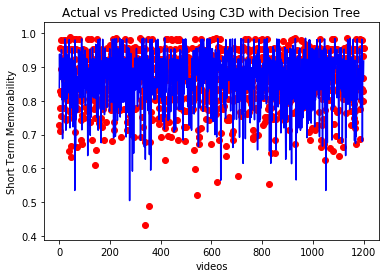

In [148]:
xTest = range(1,1201)
plt.scatter(xTest, actual["shortActual"], color = 'red')
plt.plot(xTest, pred["shortPred"], color = 'blue')
plt.title('Actual vs Predicted Using Captions with TFIDF Scores in Random Forest Regressor')
plt.xlabel('videos')
plt.ylabel('Short Term Memorability')
plt.show()

plotting the Actual vs Predicited for Long Term Memorability

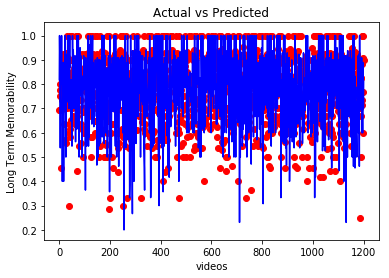

In [147]:
xTest = range(1,1201)
plt.scatter(xTest, actual["longActual"], color = 'red')
plt.plot(xTest, pred["longPred"], color = 'blue')
plt.title('Actual vs Predicted Using Captions with TFIDF Scores in Random Forest Regressor')
plt.xlabel('videos')
plt.ylabel('Long Term Memorability')
plt.show()

Using ANN Sequential Model on Captions with TFIDF

In [69]:
!pip install pyprind

distributed 1.21.8 requires msgpack, which is not installed.
You are using pip version 10.0.1, however version 19.0.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [70]:
from keras import Sequential
from keras import layers
from keras import regularizers
import pyprind
from collections import Counter

In [71]:
captions_tfidf_features.shape

(6000, 5087)

In [73]:
max_len =5087

In [74]:
X = captions_tfidf_features
y = ground_truth.iloc[:, 1:3].values

In [75]:
X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size=0.2)

Building a sequntial model with 2 layers.

In [78]:
model = Sequential()
model.add(layers.Dense(64,activation='relu',kernel_regularizer=regularizers.l2(0.001),input_shape=(max_len,)))
model.add(layers.Dropout(0.6))
model.add(layers.Dense(64,activation='relu',kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(2,activation='sigmoid'))

# compile the model 
model.compile(optimizer='adam',loss='mse',metrics=['accuracy'])

# training the model 
history = model.fit(X_train,Y_train,epochs=10,validation_data=(X_test,Y_test))


Train on 4800 samples, validate on 1200 samples
Epoch 1/10
4800/4800 [==============================] - 4s 741us/step - loss: 0.0815 - acc: 0.6562 - val_loss: 0.0252 - val_acc: 0.6925
Epoch 2/10
4800/4800 [==============================] - 2s 502us/step - loss: 0.0219 - acc: 0.7004 - val_loss: 0.0154 - val_acc: 0.6925
Epoch 3/10
4800/4800 [==============================] - 2s 497us/step - loss: 0.0168 - acc: 0.7052 - val_loss: 0.0140 - val_acc: 0.6925
Epoch 4/10
4800/4800 [==============================] - 2s 502us/step - loss: 0.0159 - acc: 0.7067 - val_loss: 0.0136 - val_acc: 0.6925
Epoch 5/10
4800/4800 [==============================] - 3s 528us/step - loss: 0.0155 - acc: 0.7062 - val_loss: 0.0134 - val_acc: 0.6925
Epoch 6/10
4800/4800 [==============================] - 2s 498us/step - loss: 0.0150 - acc: 0.7075 - val_loss: 0.0133 - val_acc: 0.6925
Epoch 7/10
4800/4800 [==============================] - 2s 502us/step - loss: 0.0151 - acc: 0.7079 - val_loss: 0.0133 - val_acc: 0.6925


In [79]:
y_pred = model.predict(X_test)
Get_score(y_pred, Y_test)

The Spearman's correlation coefficient is: 0.320
The Spearman's correlation coefficient is: 0.174


TFIDF gave better results compared to word count vectorizer in Random Forest Regression

<font style="font-size:20px;text-align:center;">***Using Captions and C3D features together***</font>

Merging both the caption features and C3D features 

In [80]:
#Using Count vector features
c3dAndCaption_features = np.concatenate((caption_features, c3d_features), axis=1)

In [81]:
#Using TFIDF features
c3dAndCaption_features = np.concatenate((captions_tfidf_features, c3d_features), axis=1)

In [82]:
c3dAndCaption_features.shape
#101 c3d features + 5087 caption features are merged

(6000, 5188)

Inputting the data into X and Y variables

In [83]:
X = c3dAndCaption_features
y = ground_truth.iloc[:, 1:3].values

Splitting the dataset into the Training set and Test set

In [84]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

Using Linear Regression Model on Captions and C3D features

In [85]:
from sklearn.linear_model import LinearRegression
LMregressor = LinearRegression()
LMregressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [86]:
y_pred = LMregressor.predict(X_test)
Get_score(y_pred, y_test)

The Spearman's correlation coefficient is: 0.094
The Spearman's correlation coefficient is: 0.028


Using Decision Tree Regression Model on Captions and C3D features

In [91]:
from sklearn.tree import DecisionTreeRegressor
DTregressor = DecisionTreeRegressor()
DTregressor.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [92]:
y_pred = DTregressor.predict(X_test)
Get_score(y_pred, y_test)

The Spearman's correlation coefficient is: 0.130
The Spearman's correlation coefficient is: 0.064


Fitting Random Forest Regression model on Captions and C3D features

In [94]:
from sklearn.ensemble import RandomForestRegressor
RFregressor = RandomForestRegressor()
RFregressor.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [95]:
y_pred = RFregressor.predict(X_test)
Get_score(y_pred, y_test)

The Spearman's correlation coefficient is: 0.268
The Spearman's correlation coefficient is: 0.066


<font style="font-size:20px;text-align:center;">***Using Keras Artificial Neural Network***</font>

In [96]:
!pip install pyprind

distributed 1.21.8 requires msgpack, which is not installed.
You are using pip version 10.0.1, however version 19.0.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [97]:
from keras import Sequential
from keras import layers
from keras import regularizers
import pyprind
from collections import Counter

In [98]:
c3dAndCaption_features.shape

(6000, 5188)

In [99]:
max_len =5188

In [100]:
X = c3dAndCaption_features
y = ground_truth.iloc[:, 1:3].values

In [101]:
X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size=0.1)

Building a sequntial model with 2 layers.

In [102]:
model = Sequential()
model.add(layers.Dense(64,activation='relu',kernel_regularizer=regularizers.l2(0.001),input_shape=(max_len,)))
model.add(layers.Dropout(0.6))
model.add(layers.Dense(64,activation='relu',kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(2,activation='sigmoid'))

# compile the model 
model.compile(optimizer='rmsprop',loss='mse',metrics=['accuracy'])

# training the model 
history = model.fit(X_train,Y_train,epochs=10,validation_data=(X_test,Y_test))


Train on 5400 samples, validate on 600 samples
Epoch 1/10
5400/5400 [==============================] - 3s 641us/step - loss: 0.0616 - acc: 0.6841 - val_loss: 0.0186 - val_acc: 0.7083
Epoch 2/10
5400/5400 [==============================] - 2s 435us/step - loss: 0.0178 - acc: 0.7002 - val_loss: 0.0138 - val_acc: 0.7083
Epoch 3/10
5400/5400 [==============================] - 3s 487us/step - loss: 0.0155 - acc: 0.7037 - val_loss: 0.0134 - val_acc: 0.7083
Epoch 4/10
5400/5400 [==============================] - 3s 492us/step - loss: 0.0149 - acc: 0.7044 - val_loss: 0.0133 - val_acc: 0.7083
Epoch 5/10
5400/5400 [==============================] - 3s 504us/step - loss: 0.0150 - acc: 0.7044 - val_loss: 0.0132 - val_acc: 0.7083
Epoch 6/10
5400/5400 [==============================] - 2s 451us/step - loss: 0.0148 - acc: 0.7044 - val_loss: 0.0132 - val_acc: 0.7083
Epoch 7/10
5400/5400 [==============================] - 3s 471us/step - loss: 0.0148 - acc: 0.7044 - val_loss: 0.0134 - val_acc: 0.7083
E

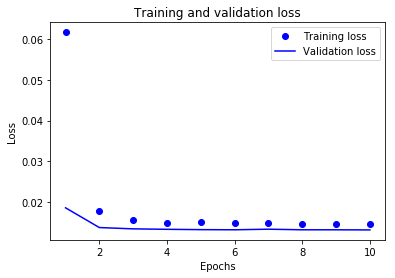

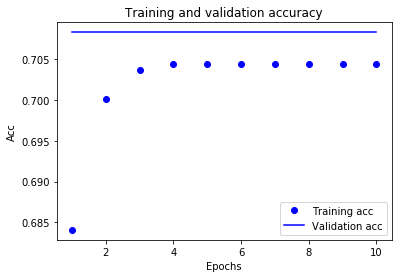

In [103]:
# visualizing the model
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(loss)+1)

plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure()
acc = history.history['acc']
val_acc = history.history['val_acc']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()
plt.show()

In [104]:
y_pred = model.predict(X_test)
Get_score(y_pred, Y_test)

The Spearman's correlation coefficient is: 0.263
The Spearman's correlation coefficient is: 0.194


<font style="font-size:25px;text-align:center;">***Extracting the features from HMP and running those features on model***</font>

Defining the method for reading HMP Features from a file

In [105]:
def read_HMP(fname):
    """Scan HMP(Histogram of Motion Patterns) features from file"""
    with open(fname) as f:
        for line in f:
            pairs=line.split()
            HMP_temp = { int(p.split(':')[0]) : float(p.split(':')[1]) for p in pairs}
    # there are 6075 bins, fill zeros
    HMP = np.zeros(6075)
    for idx in HMP_temp.keys():
        HMP[idx-1] = HMP_temp[idx]            
    return HMP

Calling the method for fetching HMP features and storing them into a array list using loop
Method works similar to that of the

In [108]:
HMP_feature_list= []
video_names_list = []
path = 'C3D/*.txt'
for filename in glob.glob('HMP/*.txt'):
    name = ((filename.split('/')[-1]).split('.')[0]+'.webm')
    video_names_list.append(name)
    HMP_features = read_HMP(filename)
    HMP_feature_list.append(HMP_features)

In [109]:
HMP_features = pd.DataFrame(np.array(HMP_feature_list).reshape(6000,6075))
HMP_features["video"] = video_names_list

In [110]:
HMP_features.head()

,0,1,2,3,4,5,6,7,8,9,...,6066,6067,6068,6069,6070,6071,6072,6073,6074,video
0,0.039095,0.013401,0.000546,0.0,0.004734,0.000320,0.0,0.0,0.000042,0.0,...,0.000199,0.000067,0.000009,0.000170,0.000490,0.000034,0.000275,0.000570,0.000177,video4960.webm
1,0.007150,0.002285,0.000158,0.0,0.000995,0.000197,0.0,0.0,0.000055,0.0,...,0.000371,0.000101,0.000018,0.000200,0.000715,0.000134,0.000292,0.000840,0.001522,video1818.webm
2,0.014682,0.003656,0.000047,0.0,0.001622,0.000025,0.0,0.0,0.000011,0.0,...,0.000038,0.000011,0.000000,0.000105,0.000054,0.000000,0.000094,0.000110,0.000007,video6811.webm
3,0.090945,0.012822,0.000117,0.0,0.007057,0.000088,0.0,0.0,0.000031,0.0,...,0.000010,0.000000,0.000000,0.000016,0.000021,0.000000,0.000036,0.000036,0.000003,video3969.webm
4,0.017401,0.003635,0.000018,0.0,0.002006,0.000035,0.0,0.0,0.000013,0.0,...,0.000078,0.000078,0.000002,0.000126,0.000468,0.000016,0.000168,0.000497,0.000029,video993.webm


merging the dataframe to sort the videos and their features respectively

In [111]:
hdf = pd.merge(ground_truth, HMP_features , on='video')

In [112]:
hdf.head()

,video,short-term_memorability,long-term_memorability,0,1,2,3,4,5,6,...,6065,6066,6067,6068,6069,6070,6071,6072,6073,6074
0,video3.webm,0.924,0.846,0.125563,0.024036,0.000314,0.0,0.015864,0.000358,0.0,...,0.000000,0.000393,0.000279,0.000000,0.000289,0.001926,0.000000,0.000086,0.000580,0.000000
1,video4.webm,0.923,0.667,0.007526,0.001421,0.000068,0.0,0.001184,0.000143,0.0,...,0.000053,0.000244,0.000066,0.000000,0.000081,0.000617,0.000094,0.000220,0.000762,0.001224
2,video6.webm,0.863,0.700,0.109584,0.018978,0.000289,0.0,0.008774,0.000208,0.0,...,0.000007,0.000054,0.000045,0.000000,0.000028,0.000291,0.000033,0.000052,0.000258,0.000215
3,video8.webm,0.922,0.818,0.120431,0.013561,0.000277,0.0,0.018974,0.000913,0.0,...,0.000059,0.001110,0.000075,0.000008,0.000333,0.000793,0.000101,0.000588,0.000503,0.000452
4,video10.webm,0.950,0.900,0.005026,0.001356,0.000055,0.0,0.000665,0.000029,0.0,...,0.000009,0.000882,0.000200,0.000009,0.000559,0.001097,0.000018,0.000632,0.001128,0.000064


In [113]:
hmp_features = hdf.iloc[:,3:6078].values

Assigning the features to X and Y

In [114]:
X = hmp_features
Y = ground_truth.iloc[:, 1:3].values

Splitting the dataset into the Training set and Test set

In [115]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

Using Linear Regression Model on Captions and C3D features

In [116]:
from sklearn.linear_model import LinearRegression
LMregressor = LinearRegression()
LMregressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [118]:
y_pred = LMregressor.predict(X_test)
Get_score(y_pred, y_test)

The Spearman's correlation coefficient is: 0.019
The Spearman's correlation coefficient is: 0.018


Using Decision Tree Regression Model on Captions and C3D features

In [119]:
from sklearn.tree import DecisionTreeRegressor
DTregressor = DecisionTreeRegressor()
DTregressor.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [120]:
y_pred = DTregressor.predict(X_test)
Get_score(y_pred, y_test)

The Spearman's correlation coefficient is: 0.066
The Spearman's correlation coefficient is: 0.061


Fitting Random Forest Regression model on Captions and C3D features

In [121]:
from sklearn.ensemble import RandomForestRegressor
RFregressor = RandomForestRegressor()
RFregressor.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [122]:
y_pred = RFregressor.predict(X_test)
Get_score(y_pred, y_test)

The Spearman's correlation coefficient is: 0.142
The Spearman's correlation coefficient is: 0.067


Using ANN Sequential Model on HMP Features

In [125]:
!pip install pyprind

distributed 1.21.8 requires msgpack, which is not installed.
You are using pip version 10.0.1, however version 19.0.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [124]:
from keras import Sequential
from keras import layers
from keras import regularizers
import pyprind
from collections import Counter

In [123]:
hmp_features.shape

(6000, 6075)

In [126]:
max_len = 6075

In [127]:
X = hmp_features
y = ground_truth.iloc[:, 1:3].values

In [128]:
X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size=0.2)

Building a sequntial model with 2 layers.

In [131]:
model = Sequential()
model.add(layers.Dense(64,activation='relu',kernel_regularizer=regularizers.l2(0.001),input_shape=(max_len,)))
model.add(layers.Dropout(0.6))
model.add(layers.Dense(64,activation='relu',kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(2,activation='sigmoid'))

# compile the model 
model.compile(optimizer='adam',loss='mse',metrics=['accuracy'])

# training the model 
history = model.fit(X_train,Y_train,epochs=10,validation_data=(X_test,Y_test))


Train on 4800 samples, validate on 1200 samples
Epoch 1/10
4800/4800 [==============================] - 4s 843us/step - loss: 0.0809 - acc: 0.6648 - val_loss: 0.0238 - val_acc: 0.6725
Epoch 2/10
4800/4800 [==============================] - 3s 640us/step - loss: 0.0212 - acc: 0.7023 - val_loss: 0.0151 - val_acc: 0.6725
Epoch 3/10
4800/4800 [==============================] - 3s 624us/step - loss: 0.0166 - acc: 0.7098 - val_loss: 0.0137 - val_acc: 0.6725
Epoch 4/10
4800/4800 [==============================] - 3s 632us/step - loss: 0.0157 - acc: 0.7108 - val_loss: 0.0134 - val_acc: 0.6725
Epoch 5/10
4800/4800 [==============================] - 3s 645us/step - loss: 0.0152 - acc: 0.7108 - val_loss: 0.0133 - val_acc: 0.6725
Epoch 6/10
4800/4800 [==============================] - 3s 663us/step - loss: 0.0152 - acc: 0.7121 - val_loss: 0.0133 - val_acc: 0.6725
Epoch 7/10
4800/4800 [==============================] - 3s 699us/step - loss: 0.0151 - acc: 0.7127 - val_loss: 0.0133 - val_acc: 0.6725


In [132]:
y_pred = model.predict(X_test)
Get_score(y_pred, Y_test)

The Spearman's correlation coefficient is: 0.083
The Spearman's correlation coefficient is: 0.077


HMP is clearly performing worst compared to other features, So i have excluded these features in the final model

In [ ]:
"""Conclusion:
None of the models Outperfomed the model that used captions when used with TFIDF vectorizer, 
Therefore My final model will be based on TFIDF values of captions using Random Forest Regressor.
"""